In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## opencvの使い方

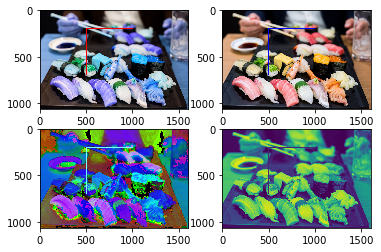

In [2]:
img_name = "sushi.jpg"
img = cv2.imread(img_name) # 画像を読み込む

x, y, width, height = (500, 200, 500, 500) # 矩形のサイズ
rect_color = (255, 0, 0) # 矩形の色 (B=0, G=255, R=0)
cv2.rectangle(img, (x, y), (x + width, y + height), rect_color, thickness=5) # 矩形の描写 

plt.subplot(221)
plt.imshow(img) #matplotlibで画像描写

plt.subplot(222)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 画像の色変換
plt.imshow(img1)

plt.subplot(223)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img2)

plt.subplot(224)
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img3)

## haar-like cascade detectorを試す

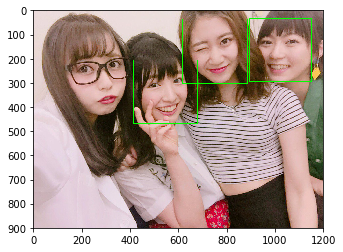

In [3]:
img_name = "girls.jpg"
img = cv2.imread(img_name) 

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化

cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
facerect = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rect_color = (0, 255, 0)
if len(facerect) > 0:
    for rect in facerect:
        x = rect[0]
        y = rect[1]
        width = rect[2]
        height = rect[3]
        cv2.rectangle(img_result, (x, y), (x + width, y + height), rect_color, thickness=2)
        
plt.imshow(img_result)

##  色々遊んでみる
- 他の人物画像を試してみる。ローカルのディレクトリに画像を保存して、img_nameを指定する。
- 他のdetectorを試す。https://github.com/Itseez/opencv/tree/master/data/haarcascades からダウンロードして、cascade_pathを指定する。[参考サイト](http://blog.mudatobunka.org/entry/2016/10/03/014520)
- 顔認識のパラメーターを変更する。[参考サイト1](http://workpiles.com/2015/04/opencv-detectmultiscale-scalefactor/) [参考サイト2](http://workpiles.com/2015/04/opencv-detectmultiscale-minneighbors/)

## 参考にしたサイト  
http://qiita.com/donksite/items/f500d301bc192efcec70  
http://ai-coordinator.jp/opencv_face